In [20]:
"""
Let's Check Zero one prediction problem


Adding Bias

"""

"\nLet's Check Zero one prediction problem\n\n\nAdding Bias\n\n"

In [33]:

from IPython.display import display, Markdown, Latex
h1 = lambda x: display(Markdown('# '+str(x)))
h3 = lambda x: display(Markdown('### '+str(x)))
h4 = lambda x: display(Markdown('#### '+ (str(x).replace(' ','&nbsp;') if str(x) else 'None')))
h5 = lambda x: display(Markdown('##### '+ (str(x).replace(' ','&nbsp;') if str(x) else 'None')))
bl = lambda x: display(Markdown('##### <font color="blue"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
rd = lambda x: display(Markdown('##### <font color="red"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
rd1 = lambda x: display(Markdown('# <font color="red"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
gra = lambda x: display(Markdown('##### <font color="gray"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
itc = lambda x: display(Markdown('***'+str(x.strip()) + '***' ))
pl = lambda: print('\n'+'#'*100 + '\n')
pl2 = lambda: print('\n'+'='*100 + '\n')
pls = lambda: print('\n'+'#'*50 +' Start '+'#'*50 + '\n')
pn = lambda x=5: print('\n'*x)

from collections import Counter


## Hand Made Neural Network

https://144.34.140.210:8579/notebooks/Git_Qiliang/ML_ANN_Gradiant_Decent/Backpropagation.ipynb

In [34]:
import pdb
bp = pdb.set_trace

import random
import uuid
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math


In [208]:
# # Direct
# def relu(x):
#     return x
# activation_func = np.vectorize(relu)  

         
# def derivative(x):
#     return 1
# derivative_func = np.vectorize(derivative)   


# Relu
def relu(x):
    if x >0:
        return x
    else:
        return 0

activation_func = np.vectorize(relu)  

         
def derivative(x):
    if x>0:
        return 1
    else:
        return 0
derivative_func = np.vectorize(derivative)   


# # Sigmoid
# def relu(x):
#     if x<-100:
#         return 0
#     elif x>100:
#         return 1
#     else:
#         y = 1/(1+np.exp(-x))
#         return y
# activation_func = np.vectorize(relu)  

         
# def derivative(x):
#     return x*(1-x)
# derivative_func = np.vectorize(derivative)   
    

    

# def relu(x):
#     if x>0:
#         if x<5:
#             return x
#         else:
#             return 5
#     else:
#         return 0


# activation_func = np.vectorize(relu)  
# # activation_func = np.vectorize(lambda x: x) 
         
# def derivative(x):
#     if x>0:
#             return 1
#     else:
#         return 0
# #         return -1
# #         return 1
# derivative_func = np.vectorize(derivative)   
    
    
class Weight:
    def __init__(self,m,n):
        self.sigma = 0.2# 0.1 # 0.3 #0.2
        self.mu = 0 #0.5
        self.m = m
        self.n = n
        self.val = self.sigma * np.random.randn(m+1,n) + self.mu
#         self.normalize()
        
    def normalize(self):
        self.val = self.val/self.val.sum()

class Layer:
    def __init__(self,n,id=None,output_ind=False):
        self.val = None
        self.id = id
        self.input_weight = None
        self.output_weight = None
        self.pre_layer = None
        self.next_layer = None
        self.n = n
        self.delta_weight = None
        self.output_ind = output_ind
        
        
    def full_connect(self,other):
        m = self.n
        n = other.n
#         weight = Weight(m,n+1) #$
#         weight = Weight(m+1,n) #$
        weight = Weight(m,n) #$
#         weight = Weight(m,n)
        self.output_weight = weight
        other.input_weight = weight
        
        self.next_layer = other
        other.pre_layer = self
    
    def stats(self):
        print("n:",self.n)
        if self.output_weight:
            print('Weight:',self.output_weight.val.shape)
        print()
            
    def pull_in(self,input_list):
        self.val = np.array([input_list,])
#         self.val = self.val/self.val.sum()
            
    def forwarding(self):
        print(1)
#         print(self.id,'forwarding')
        val = self.val
#         val = np.append(val,np.ones((self.n,1))) #$
        val = np.append(val,[1])
#         bp()
        print('val:',val.shape)
        print('weight:',self.output_weight.val.shape)

        val = val.dot(self.output_weight.val)

#         bp()
        try:
            if self.next_layer:
                if not self.next_layer.output_ind:
                    self.next_layer.val = activation_func(val)   
                else:
                    self.next_layer.val = val 
        except:
#             bp()
            raise
        
    def backwarding(self, error_term, learning_rate):
#         print(self.id,'backwarding')
        pre = self.pre_layer
        K1 = pre.output_weight.val
#         print(K1.shape)
        while(pre.pre_layer):
            pre = pre.pre_layer
            K1 = pre.output_weight.val.dot(K1)
            
        pre_val = np.append(pre.val, [1])
        K1 = pre_val.dot(K1)
#         print('K1:',K1.shape)


        next_layer = self.next_layer
        if next_layer.output_weight:
            K2 = next_layer.output_weight.val
            while(next_layer.next_layer.output_weight):
                next_layer = next_layer.next_layer
                bp()
                K2 = K2.dot(next_layer.output_weight.val) 
#             print("K2:",K2.shape)
        else:
            K2 = np.array([[1]])
                   
        
        cur_val = np.append(self.val, [1])
                
        derivative = (K1.T*cur_val.T).dot(K2.T)
#         derivative = K1.T.dot(K2.T)
#         bp()
    
        if not self.output_ind:
            K3 = derivative_func(cur_val)
#             bp()
            derivative = derivative*K3.T
#         bp()
#         print("Derivative:",derivative.shape)
#         return derivative

#         derivative = derivative/derivative.sum()
    
        delta_weight = learning_rate*(-1)*(error_term)*derivative
#         bp()
#         print('delta_weight:',delta_weight)
        if type(self.delta_weight)!=type(None):
            self.delta_weight += delta_weight
        else:
            self.delta_weight = delta_weight
    
    def update_weights(self):
        if type(self.delta_weight)!=type(None):
            self.output_weight.val += self.delta_weight
            self.delta_weight = None
    
class Network:
    def __init__(self,input_layer,output_layer):
        self.input_layer = input_layer
        self.output_layer = output_layer
        self.learning_rate = 0.01
        
    def set_learning_rate(self,rate):
        self.learning_rate = rate
        
              
    def batch_forwarding(self):
        cur = self.input_layer
        while(cur.next_layer):
            cur.forwarding()
            cur = cur.next_layer
             
    def get_error_term(self,ground_truth_list):      
        error = self.output_layer.val-ground_truth_list
        return error
    
    def batch_backwarding(self, error_term):
        cur = self.input_layer.next_layer
        while(cur and cur.output_weight):
            cur.backwarding(error_term, self.learning_rate)
            cur = cur.next_layer
            
    def one_train(self,x,y):
        input_layer.pull_in(x)
        self.batch_forwarding()
        error_term = self.get_error_term(y)
        self.batch_backwarding(error_term)
        
        
    def batch_update_weights(self):
        cur = self.input_layer.next_layer
        while(cur and cur.output_weight):
            cur.update_weights() 
            cur = cur.next_layer

    def batch_train(self,X,Y,batch_size=20):
        i=0
        for i,(x,y) in enumerate(zip(X,Y)):
            self.one_train(x,y)
            if i%batch_size==0:
                self.batch_update_weights()
        self.batch_update_weights()
        
        
    def predict(self,x):
        input_layer.pull_in(x)
        self.batch_forwarding()
        return self.output_layer.val
    
    
#     def save(self,model_dir='./model.json'):
#         res = []
#         cur = self.input_layer
#         while(cur.output_weight):
#             res.append(cur)
         
#     def load(self,model_dir='./model.json')
#         pass



# # Networks
# input_layer = Layer(10,'in')
# l1 = Layer(10,'l1')
# l2 = Layer(50,'l2')
# l3 = Layer(50,'l3')
# l4 = Layer(10,'l4')
# output_layer = Layer(1,'out')


# input_layer.full_connect(l1)
# l1.full_connect(l2)
# l2.full_connect(l3)
# l3.full_connect(l4)
# l4.full_connect(output_layer)

# x = random.choices(range(100), k=10)

# print(x)
# y = np.array([[1]])

# nk = Network(input_layer,output_layer)
# nk.one_train(x,y)



In [209]:
"""
最简单和最直接的方法是什么

看起来不行

如何保证每次都有进步呢？  这种简单的信息是如何被学到的呢？

这是一个超级不稳定的系统


产生合理的顿感系数



"""

'\n最简单和最直接的方法是什么\n\n看起来不行\n\n如何保证每次都有进步呢？  这种简单的信息是如何被学到的呢？\n\n这是一个超级不稳定的系统\n\n\n产生合理的顿感系数\n\n\n\n'

In [210]:
# # Networks
# input_layer = Layer(10,'in')
# l1 = Layer(10,'l1')
# l2 = Layer(50,'l2')
# l3 = Layer(50,'l3')
# l4 = Layer(10,'l4')
# output_layer = Layer(1,'out',output_ind=True)

# input_layer.full_connect(l1)
# l1.full_connect(l2)
# l2.full_connect(l3)
# l3.full_connect(l4)
# l4.full_connect(output_layer)


# # Networks
# input_layer = Layer(10,'in')
# l1 = Layer(10,'l1')
# l2 = Layer(50,'l2')
# l2_5 = Layer(50,'l2.5')
# l3 = Layer(50,'l3')
# l4 = Layer(10,'l4')
# output_layer = Layer(1,'out',output_ind=True)

# input_layer.full_connect(l1)
# l1.full_connect(l2)
# l2.full_connect(l2_5)
# l2_5.full_connect(l3)
# l3.full_connect(l4)
# l4.full_connect(output_layer)

# Networks
input_layer = Layer(1,'in')
l1 = Layer(10,'l1')
l2 = Layer(50,'l2')
l3 = Layer(50,'l3')
l4 = Layer(50,'l4')
output_layer = Layer(1,'out',output_ind=True)

input_layer.full_connect(l1)
l1.full_connect(l2)
l2.full_connect(l3)
l3.full_connect(l4)
l4.full_connect(output_layer)

nk = Network(input_layer,output_layer)


# # Networks
# input_layer = Layer(1,'in')
# l1 = Layer(10,'l1')
# l2 = Layer(10,'l2')
# output_layer = Layer(1,'out',output_ind=True)

# input_layer.full_connect(l1)
# l1.full_connect(l2)
# l2.full_connect(output_layer)

# nk = Network(input_layer,output_layer)

In [211]:
X = []
Y = []
# for i in range(1):
# for i in range(10):
# for i in range(100):
# for i in range(500):
# for i in range(1000):
for i in range(10000):
# for i in range(100000):
# for i in range(1000000):
# for i in range(5000000):
# for i in range(15000000):
# for i in range(50000000):
#     x = np.array(random.choices(range(100), k=10))
    x = np.array([np.random.rand(),])
    if x>0.5:
        y=1
    else:
        y=0
        
    X.append(x)
    Y.append(y)

In [212]:
# nk.set_learning_rate(0.0000000000001)
# nk.set_learning_rate(0.00000001)
# nk.set_learning_rate(0.00001)
# nk.set_learning_rate(0.0001)
# nk.set_learning_rate(0.001)
nk.set_learning_rate(0.01)
# nk.set_learning_rate(0.1)
# nk.set_learning_rate(1)
# nk.set_learning_rate(2)
nk.batch_train(X,Y)

1
val: (2,)
weight: (2, 10)
1
val: (11,)
weight: (11, 50)
1
val: (51,)
weight: (51, 50)
1
val: (51,)
weight: (51, 50)
1
val: (51,)
weight: (51, 1)
> <ipython-input-208-a009e59c6f2f>(163)backwarding()
-> K2 = K2.dot(next_layer.output_weight.val)
(Pdb) l
158  	        if next_layer.output_weight:
159  	            K2 = next_layer.output_weight.val
160  	            while(next_layer.next_layer.output_weight):
161  	                next_layer = next_layer.next_layer
162  	                bp()
163  ->	                K2 = K2.dot(next_layer.output_weight.val)
164  	#             print("K2:",K2.shape)
165  	        else:
166  	            K2 = np.array([[1]])
167  	
168  	
(Pdb) K2.shape
(51, 50)
(Pdb) next_layer.output_weight.val
array([[ 0.26852642,  0.31430842,  0.09237543, ..., -0.13795405,
         0.077337  ,  0.07080477],
       [-0.14159699, -0.49460854, -0.00166471, ...,  0.12029032,
        -0.07366632,  0.19019331],
       [-0.19918107,  0.04113629,  0.10223613, ...,  0.14805489,
 

ValueError: shapes (51,50) and (51,50) not aligned: 50 (dim 1) != 51 (dim 0)

In [225]:
a = np.zeros((51,50))
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [231]:
b = np.ones((51,1))
b

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [232]:
# c = np.append(a,b)
c = np.concatenate((a,b), axis=1)
print(c.shape)
c

(51, 51)


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [223]:
np.append(val,[1])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [120]:
a.T

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
a.reshape

In [123]:
val = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
np.append(val,[1])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [118]:


np.ones((10,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [117]:
np.ones((self.n,1))

NameError: name 'self' is not defined

In [9]:
x = np.array([np.random.rand(),])
if x>0.5:
    y=1
else:
    y=0
y_predict = nk.predict(x)

print('x:',x)
print('y_real:',y)
print('y_predict:',y_predict)
print('rate:',x/y_predict)

# print('l1:\n',l1.val)
# print('l2:\n',l2.val)
# print('l3:\n',l3.val)
# print('l4:\n',l4.val)
# pl()

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [36]:
for i in range(10000):
    x = np.array([np.random.rand(),])
    if x>0.5:
        y=1
    else:
        y=0
    y_predict = nk.predict(x)
    
    print(y-y_predict)

[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]

[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]

[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]

[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]

[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]

[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]

[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]

[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]

In [361]:
"""
非常成功的正确收敛了  模型本身需要够复杂  但很容易训练失败    成功了，看如何能达成稳定

"""

'\n非常成功的正确收敛了  模型本身需要够复杂  但很容易训练失败  \n\n'

In [407]:
len(X)

10000

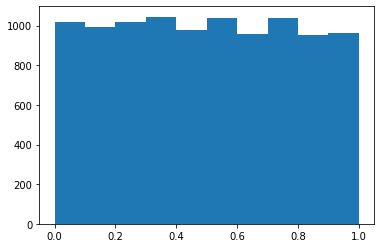

In [408]:
import matplotlib.pyplot as plt
res = np.array([x[0] for x in X])
plt.hist(res)
plt.show()

In [410]:
from collections import Counter
Counter(Y)

Counter({1: 4948, 0: 5052})

In [11]:
"""

可以很快收敛  anyway


结果比例反直觉的


这里01收敛的也非常快

尝试下非0、1，看是否会收敛   可以收敛

需要有偏置项？

使用更简单的网络试试


也许可以储备多种终端传导方式供选择   

有多种结合体？ 不同特性的    如何连接

似乎没有学到   但是成功产生收敛了   因为weight叠加加成的影响，学习率变得很重要

初始weight的选取似乎影响很大

"""

'\n尝试下非0、1，看是否会收敛   可以收敛\n\n需要有偏置项？\n\n使用更简单的网络试试\n\n\n也许可以储备多种终端传导方式供选择   \n\n有多种结合体？ 不同特性的    如何连接\n\n似乎没有学到   但是成功产生收敛了   因为weight叠加加成的影响，学习率变得很重要\n\n初始weight的选取似乎影响很大\n\n'

In [414]:
input_layer.val

array([[[0.93168967],
        [0.41769136],
        [0.56755   ],
        ...,
        [0.76675127],
        [0.11404035],
        [0.38177733]]])

In [415]:
l1.output_weight.val

array([[ 6.48575931e-01, -2.61821992e-01,  3.41197962e-01,
        -2.70848168e-01, -1.89666032e-01,  1.82858315e-01,
         1.49289352e-01, -1.74109576e-01,  4.55117982e-02,
        -3.24640440e-01, -2.89453967e-01, -4.76644242e-01,
        -1.31207551e-02,  1.34327629e-01,  4.13722677e-01,
         1.07958981e+00,  1.95322853e-01,  5.32593216e-01,
         5.79857490e-01,  5.53632399e-01,  7.63291569e-02,
        -2.73370559e-01,  2.47495647e-01,  5.70022324e-01,
         1.23769562e-01,  1.48592271e-01,  1.67935025e-02,
        -2.29164231e-01, -1.55627901e-01, -1.81234500e-01,
         3.91714393e-01,  2.24579313e-01,  1.78875060e-01,
         1.92322414e-01,  2.32126459e-01,  3.52121000e-01,
         1.02319712e-01,  2.24946641e-01,  9.17142766e-02,
        -3.03496849e-01,  6.28513483e-02,  2.67915419e-01,
        -6.71364049e-01,  5.72546509e-01, -2.91154448e-01,
         7.51729776e-03, -1.42788788e-01,  4.90501224e-01,
        -4.00775590e-02, -3.35285908e-01],
       [ 2.21

In [416]:
l1.val

array([[[0.28908947, 0.        , 0.        , ..., 0.02537243,
         0.31877621, 0.19257005],
        [0.12960343, 0.        , 0.        , ..., 0.01137487,
         0.14291247, 0.08633223],
        [0.17610234, 0.        , 0.        , ..., 0.01545592,
         0.19418638, 0.11730637],
        ...,
        [0.23791153, 0.        , 0.        , ..., 0.02088071,
         0.26234279, 0.15847909],
        [0.03538503, 0.        , 0.        , ..., 0.00310563,
         0.03901873, 0.02357089],
        [0.11845984, 0.        , 0.        , ..., 0.01039683,
         0.13062454, 0.07890919]]])

In [417]:
l2.output_weight.val

array([[-0.03488541, -0.45966827, -0.01573354, ..., -0.09260969,
        -0.16495266,  0.07754998],
       [-0.07985713, -0.26272468, -0.05222425, ...,  0.05710767,
         0.01624171,  0.02045331],
       [-0.14955078, -0.06722164, -0.03133866, ...,  0.09745848,
         0.14031927, -0.23501388],
       ...,
       [-0.03494336, -0.14532482,  0.21230842, ...,  0.20411231,
        -0.10928717,  0.06259859],
       [-0.0526956 , -0.29650129,  0.09407037, ...,  0.14858692,
        -0.15305902, -0.17181554],
       [ 0.36069459, -0.33211628, -0.10682322, ..., -0.24088721,
         0.42794454, -0.36676389]])

In [418]:
l2.val

array([[[0.43518066, 0.        , 0.2633262 , ..., 0.13149305,
         0.        , 0.        ],
        [0.19509844, 0.        , 0.11805334, ..., 0.05895043,
         0.        , 0.        ],
        [0.26509555, 0.        , 0.16040833, ..., 0.08010058,
         0.        , 0.        ],
        ...,
        [0.35813998, 0.        , 0.21670918, ..., 0.10821464,
         0.        , 0.        ],
        [0.05326683, 0.        , 0.03223156, ..., 0.01609497,
         0.        , 0.        ],
        [0.17832344, 0.        , 0.10790286, ..., 0.05388174,
         0.        , 0.        ]]])

In [419]:
l3.output_weight.val

array([[ 0.3284684 , -0.11192832,  0.11777804, ..., -0.08515759,
        -0.11974508, -0.06958566],
       [-0.15710585,  0.25051281,  0.1064164 , ..., -0.11810197,
         0.03967293, -0.18851669],
       [ 0.0027836 ,  0.00348774, -0.00382004, ...,  0.19775985,
        -0.21934659, -0.17905477],
       ...,
       [ 0.20385933, -0.11741266, -0.06257605, ...,  0.05384237,
        -0.08157211,  0.12689128],
       [-0.05302656,  0.04229652, -0.30201216, ..., -0.26431405,
         0.28383372, -0.1838685 ],
       [-0.10348162, -0.11253568,  0.20893053, ...,  0.16714566,
        -0.17152619,  0.15138344]])

In [420]:
l3.val

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

In [173]:
l4.output_weight.val

array([[-0.59472918],
       [-0.24441027],
       [ 0.62609755],
       [-0.10691708],
       [ 0.30003725],
       [ 0.18347305],
       [ 0.18243542],
       [ 0.16239599],
       [-0.22661432],
       [ 0.02297569],
       [ 0.69880413],
       [ 0.56031021],
       [ 0.08163068],
       [ 0.04369627],
       [ 0.45100922],
       [ 0.18293961],
       [-0.0116464 ],
       [-0.55731291],
       [ 0.2540942 ],
       [ 0.09632412],
       [ 0.50653305],
       [-0.28051569],
       [ 0.0069488 ],
       [ 0.10843931],
       [ 0.03860016],
       [ 0.47657341],
       [-0.08330561],
       [-0.17609592],
       [-0.05295108],
       [-0.25617296],
       [ 0.55676044],
       [-0.07676087],
       [-0.07558063],
       [-0.01314843],
       [-0.23466799],
       [ 0.41508251],
       [-0.25120104],
       [ 0.01402803],
       [-0.13615577],
       [ 0.01784295],
       [ 0.30223832],
       [-0.57344112],
       [ 0.36587298],
       [-0.06703676],
       [ 0.10811401],
       [ 0

In [174]:
l4.val

array([[ 1.95236050e-01,  9.57827551e-02,  1.54415396e-02,
         1.90973974e-01, -1.90742693e-01,  1.40109049e-01,
         1.30953365e-01,  1.74646112e-01,  5.09469716e-02,
        -6.48411898e-02, -3.11482187e-01,  1.79225692e-01,
        -1.63757917e-04, -1.08607787e-01,  1.28668819e-02,
         1.73872095e-01,  8.19001427e-03,  1.69637233e-01,
         7.29088121e-03, -3.03357257e-01, -4.05746328e-01,
         1.66482086e-01, -6.84090987e-02,  8.80046900e-02,
         1.04884739e-01,  1.17373835e-01,  1.73952463e-02,
        -7.02409628e-02, -1.74645586e-01, -1.15991539e-01,
        -3.60247616e-02, -1.36674438e-02,  3.14791959e-01,
         8.52311187e-02,  4.59278015e-02,  2.57992622e-02,
         4.82661233e-02,  3.51150368e-03, -6.80787839e-02,
         1.16164178e-01, -4.16179338e-01,  2.80416144e-03,
        -3.33978546e-01,  4.34409281e-02, -2.09042447e-02,
        -2.25706641e-01, -3.88800903e-02,  9.62131200e-02,
         1.38550807e-01,  2.41214260e-01]])

In [175]:
output_layer.val

array([[-0.90226704]])

In [176]:
output_layer.val[0][0]

-0.9022670437452267

"""

当前设置非常容易出现参数消失


找一种函数可以自动的大变小，小变大

"""

## Notes

https://app.yinxiang.com/shard/s18/nl/18934792/e81511f4-0b23-48bc-b627-22416bbf9554

In [ ]:
"""


"""